In [1]:
!git clone https://github.com/sosamandara/token_reduction_nlp.git

Cloning into 'token_reduction_nlp'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 206 (delta 56), reused 177 (delta 32), pack-reused 0
Receiving objects: 100% (206/206), 7.00 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
%cd /content/token_reduction_nlp/notebooks

/content/token_reduction_nlp/notebooks


In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Assuming the notebooks are in the notebooks directory and executed from there
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Add the models and src directories to the Python path
models_dir = os.path.join(project_root, 'models')
src_dir = os.path.join(project_root, 'src')

sys.path.append(models_dir)
sys.path.append(src_dir)

# Verify that the paths are correctly added
print("Current directory:", current_dir)
print("Project root directory:", project_root)
print("Models directory added to sys.path:", models_dir in sys.path)
print("Src directory added to sys.path:", src_dir in sys.path)

Current directory: d:\TESI\token_reduction_nlp\notebooks
Project root directory: d:\TESI\token_reduction_nlp
Models directory added to sys.path: True
Src directory added to sys.path: True


In [2]:
#!pip install datasets
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config
from modeling_topK_gpt2 import CustomGPT2LMHeadModel
from collections import defaultdict
import matplotlib.pyplot as plt
from datasets import load_dataset
from perplexity import evaluate_perplexity_with_window, evaluate_and_save_perplexities, recalculate_and_plot_perplexities, recalculate_and_plot_perplexities_normal
from functions import load_custom_model

d:\Conda\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
def calculate_reduction(lenght, mask):
  actual_lenght=lenght
  for percentage in mask:
    actual_lenght = (actual_lenght - int(actual_lenght*percentage))
  return actual_lenght + 1

window_sizes = [50, 100, 200, 300, 500, 1000]
remaining_tokens = []
per_reduction = []
mask = [0.0, 0.0, 0.0, 0.2, 0.2, 0.15, 0.1, 0.1, 0.05, 0.05, 0.0, 0.05]
for w in window_sizes:
  remaining_tokens.append(calculate_reduction(w, mask))

  per_reduction.append(round(calculate_reduction(w, mask)/w,2))
  #per_reduction.append(round(1-round(calculate_reduction(w, mask)/w,2),2))
print(remaining_tokens)
per_reduction

[22, 40, 79, 117, 191, 381]


[0.44, 0.4, 0.4, 0.39, 0.38, 0.38]

In [4]:
def calculate_reduction(lenght, mask):
  actual_lenght=lenght
  for percentage in mask:
    actual_lenght = (actual_lenght - int(actual_lenght*percentage))
  return actual_lenght + 1

window_sizes = [50, 100, 200, 300, 500, 1000]
remaining_tokens = []
per_keep = []

mask_10 = [0.0, 0.15, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2, 0.05, 0.05]
mask_20 = [0.0, 0.0, 0.25, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.0, 0.05]
mask_30 = [0.0, 0.0, 0.2, 0.15, 0.15, 0.15, 0.2, 0.2, 0.05, 0.05, 0.0, 0.0]
mask_40 = [0.0, 0.0, 0.0, 0.2, 0.2, 0.15, 0.1, 0.1, 0.05, 0.05, 0.0, 0.05]
mask_50 = [0.0, 0.0, 0.0, 0.2, 0.15, 0.07, 0.07, 0.1, 0.05, 0.05, 0.0, 0.0]
mask_60 = [0.0, 0.0, 0.07, 0.07, 0.1, 0.07, 0.07, 0.05, 0.05, 0.05, 0.0, 0.0]
mask_70 = [0.0, 0.0, 0.05, 0.07, 0.1, 0.07, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0]
mask_80 = [0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0]
mask_90 = [0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0]

masks = [mask_10, mask_20, mask_30, mask_40, mask_50,
         mask_60, mask_70, mask_80, mask_90,]
mask_number = ["10", "20", "30", "40", "50", "60", "70", "80", "90"]

for i, mask in enumerate(masks):
  #remaining_tokens = []
  per_keep = []
  for w in window_sizes:
    #remaining_tokens.append(calculate_reduction(w, mask))
    per_keep.append(round(calculate_reduction(w, mask)/w,2))
    #print(remaining_tokens)
  print("-----",mask_number[i],"-----")
  print(per_keep)

----- 10 -----
[0.14, 0.13, 0.1, 0.1, 0.1, 0.1]
----- 20 -----
[0.24, 0.22, 0.2, 0.2, 0.19, 0.19]
----- 30 -----
[0.34, 0.31, 0.29, 0.3, 0.29, 0.29]
----- 40 -----
[0.44, 0.4, 0.4, 0.39, 0.38, 0.38]
----- 50 -----
[0.52, 0.51, 0.49, 0.49, 0.48, 0.48]
----- 60 -----
[0.68, 0.61, 0.59, 0.59, 0.58, 0.58]
----- 70 -----
[0.76, 0.71, 0.68, 0.68, 0.67, 0.67]
----- 80 -----
[0.82, 0.8, 0.79, 0.78, 0.78, 0.78]
----- 90 -----
[0.92, 0.9, 0.89, 0.88, 0.88, 0.88]


In [5]:
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
config = GPT2Config.from_pretrained(model_name)
model_gpt = GPT2LMHeadModel.from_pretrained(model_name, config=config).to('cuda')

# Layers to prune
layers_to_prune = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Load custom models with different k_percent values
custom_models = {}
for i, mask in enumerate(masks):
    model_id = f"random_{i * 10 + 10}"
    custom_models[model_id] = load_custom_model(model_name, config, mask, selection_method="random", layers_to_prune=layers_to_prune)

In [ ]:
test = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")
encodings = tokenizer("\n\n".join(test["text"]), return_tensors="pt")

In [ ]:
models = [model_gpt] + list(custom_models.values())
model_names = ['gpt2'] + [f'custom_{i * 10}%' for i in range(1, len(custom_models) + 1)]
window_sizes = [50, 100, 200, 300, 500, 1000]
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
output_dir = os.path.join(project_root, 'results/Random_Removal')

# Evaluate perplexities and save results
evaluate_and_save_perplexities(models, model_names, encodings, window_sizes, output_dir)

# Load from results folder

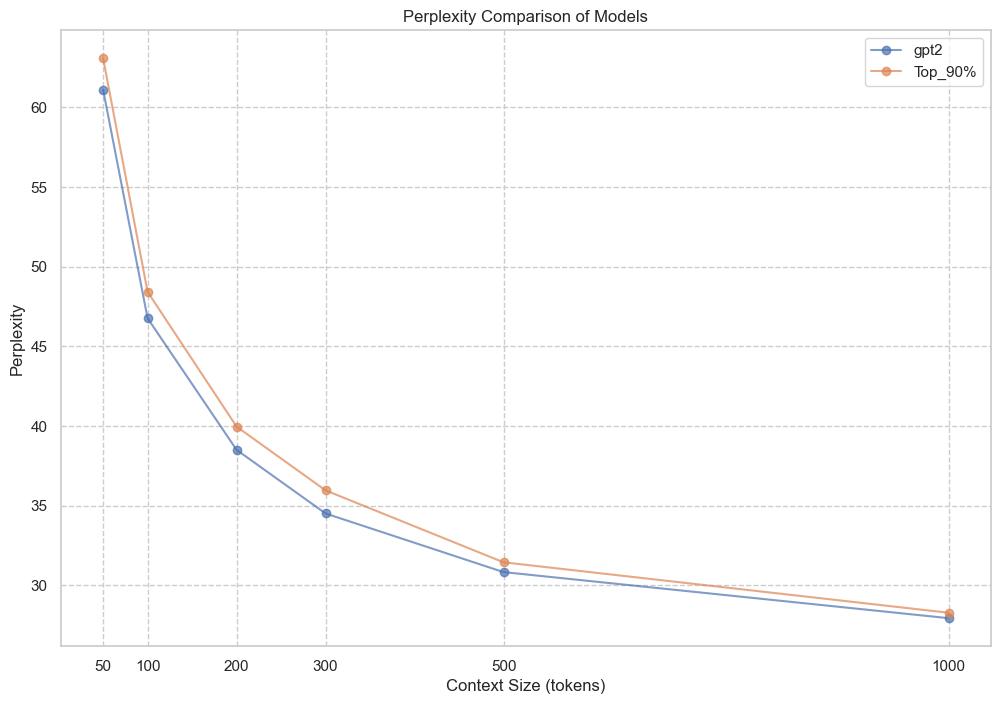

In [4]:
# Example usage
window_sizes = [50, 100, 200, 300, 500, 1000]
#model_names = ['gpt2', 'custom_10%', 'custom_25%', 'custom_40%', 'custom_50%', 'custom_60%', 'custom_70%', 'custom_80%', 'custom_90%']
#model_names = ['gpt2', 'custom_25%', 'custom_40%', 'custom_50%', 'custom_60%', 'custom_70%', 'custom_80%', 'custom_90%']
model_names = ['gpt2', 'custom_20%', 'custom_30%', 'custom_40%', 'custom_50%', 'custom_60%', 'custom_70%', 'custom_80%', 'custom_90%']
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
output_dir = os.path.join(project_root, 'results/Mean_Attention_Removal')

recalculate_and_plot_perplexities_normal(window_sizes, model_names, output_dir)

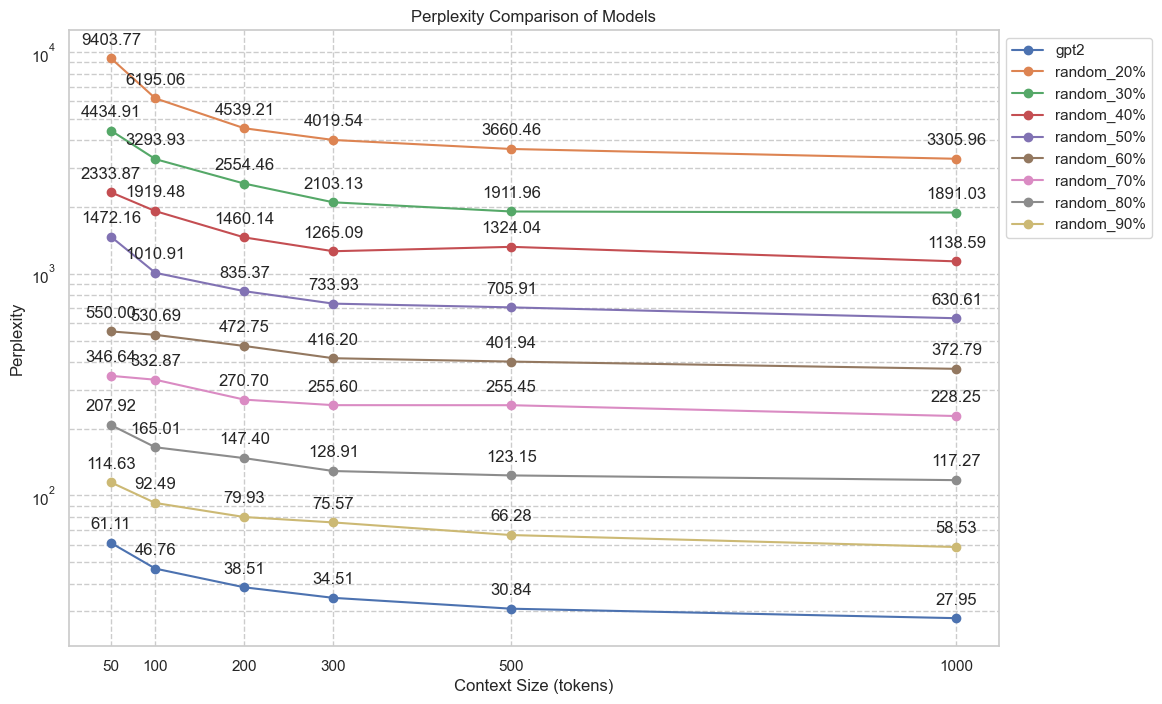

Recalculated perplexities and plot saved to d:\TESI\token_reduction_nlp\results/Random_Removal


In [4]:
# Example usage
window_sizes = [50, 100, 200, 300, 500, 1000]
#model_names = ['gpt2', 'custom_10%', 'custom_25%', 'custom_40%', 'custom_50%', 'custom_60%', 'custom_70%', 'custom_80%', 'custom_90%']
#model_names = ['gpt2', 'custom_25%', 'custom_40%', 'custom_50%', 'custom_60%', 'custom_70%', 'custom_80%', 'custom_90%']
model_names = ['gpt2', 'custom_20%', 'custom_30%', 'custom_40%', 'custom_50%', 'custom_60%', 'custom_70%', 'custom_80%', 'custom_90%']
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
output_dir = os.path.join(project_root, 'results/Random_Removal')

recalculate_and_plot_perplexities(window_sizes, model_names, output_dir)

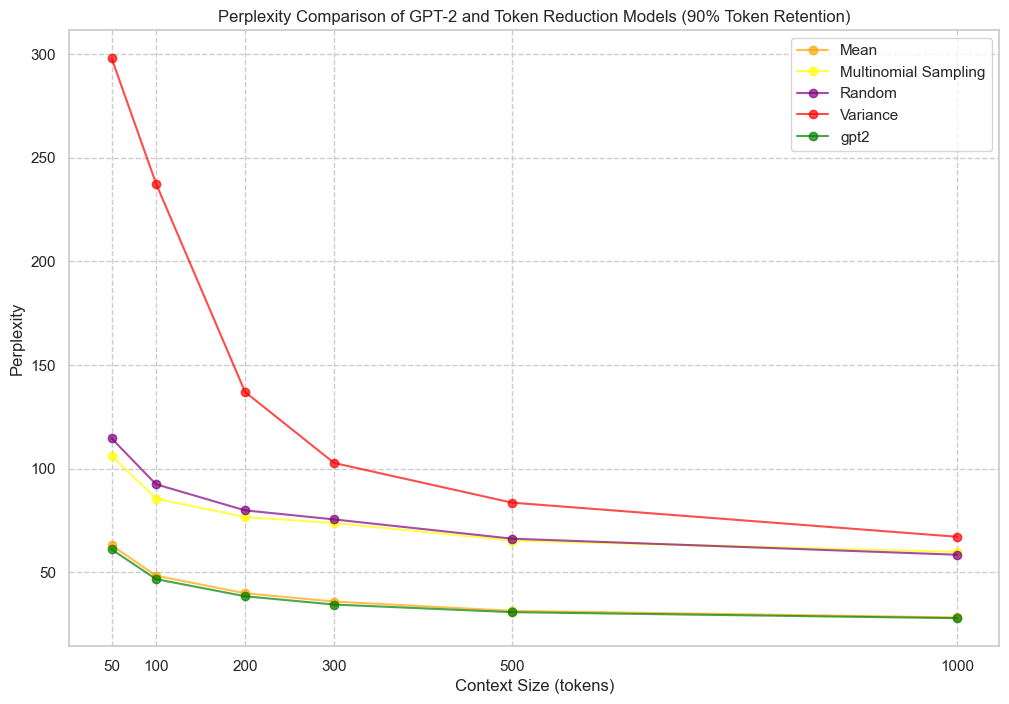

In [28]:
def recalculate_and_plot_perplexities_custom_90(window_sizes, directories, output_dir):
    """
    Recalculate perplexities from log probabilities, save to CSV, and plot the results.

    :param window_sizes: List of window sizes to evaluate
    :param directories: Dictionary containing model method names as keys and directory paths as values
    :param output_dir: Directory to save the results
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize dictionary to store the recalculated perplexities
    recalculated_perplexities = {method: [] for method in directories.keys()}
    recalculated_perplexities['gpt2'] = []

    # Function to calculate perplexity from log probabilities
    def calculate_perplexity(log_probs):
        avg_log_prob = np.mean(log_probs)
        perplexity = np.exp(-avg_log_prob)
        return perplexity

    # Recalculate perplexities for each method and window size
    for method, directory in directories.items():
        for window_size in window_sizes:
            log_probs_filename = f'log_probs_custom_90%_window_{window_size}.csv'
            log_probs_path = os.path.join(directory, log_probs_filename)
            
            if os.path.exists(log_probs_path):
                log_probs = pd.read_csv(log_probs_path)['log_probs'].tolist()
                perplexity = calculate_perplexity(log_probs)
                recalculated_perplexities[method].append(perplexity)
            else:
                print(f"File not found: {log_probs_path}")
                recalculated_perplexities[method].append(np.nan)  # Append NaN if file is not found

    # Calculate perplexities for gpt2
    gpt2_directory = next(iter(directories.values()))
    for window_size in window_sizes:
        log_probs_filename = f'log_probs_gpt2_window_{window_size}.csv'
        log_probs_path = os.path.join(gpt2_directory, log_probs_filename)
        
        if os.path.exists(log_probs_path):
            log_probs = pd.read_csv(log_probs_path)['log_probs'].tolist()
            perplexity = calculate_perplexity(log_probs)
            recalculated_perplexities['gpt2'].append(perplexity)
        else:
            print(f"File not found: {log_probs_path}")
            recalculated_perplexities['gpt2'].append(np.nan)  # Append NaN if file is not found

    # Save recalculated perplexities to CSV
    for method, perplexities in recalculated_perplexities.items():
        df_recalculated = pd.DataFrame({
            'window_size': window_sizes,
            'perplexity': perplexities
        })
        output_path = os.path.join(output_dir, f'recalculated_perplexities_{method}.csv')
        df_recalculated.to_csv(output_path, index=False)
        #print(f"Saved recalculated perplexities for {method} to {output_path}")

    # Custom colors
    colors = {
        'gpt2': 'green',
        'Mean': 'orange',
        'Max_Attention': 'blue',
        'Random': 'purple',
        'Variance': 'red',
        'Multinomial Sampling': 'yellow'
    }

    # Plotting the results
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")

    # Plot each method's perplexity
    for method, perplexities in recalculated_perplexities.items():
        color = colors.get(method, 'gray')
        plt.plot(window_sizes, perplexities, label=method, marker='o', alpha=0.7, color=color)


    plt.xticks(window_sizes)  # Ensure x-axis has the correct window sizes as ticks
    plt.xlabel("Context Size (tokens)")
    plt.ylabel("Perplexity")
    plt.title("Perplexity Comparison of GPT-2 and Token Reduction Models (90% Token Retention)")
    plt.legend()
    plt.grid(True, which="both", ls="--")

    # Save the plot to a file
    plot_path = os.path.join(output_dir, 'recalculated_perplexity_comparison_plot_custom_90.png')
    plt.savefig(plot_path)
    plt.show()

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
mean_attention_dir = os.path.join(project_root, 'results/Mean_Attention_Removal')
max_attention_dir = os.path.join(project_root, 'results/Max_Attention_Removal')
random_removal_dir = os.path.join(project_root, 'results/Random_Removal')
variance_removal_dir = os.path.join(project_root, 'results/Variance_Removal')
weighting_removal_dir = os.path.join(project_root, 'results/Weighting_Removal')

# Dictionary of directories for each method
directories = {
    'Mean': mean_attention_dir,
    #'Max_Attention': max_attention_dir,
    'Multinomial Sampling': weighting_removal_dir,
    'Random': random_removal_dir,
    'Variance': variance_removal_dir
}

# Define window sizes
window_sizes = [50, 100, 200, 300, 500, 1000]

# Define output directory
output_dir = os.path.join(project_root, 'results/Perplexity_Comparison_Custom_90')

# Recalculate and plot perplexities
recalculate_and_plot_perplexities_custom_90(window_sizes, directories, output_dir)

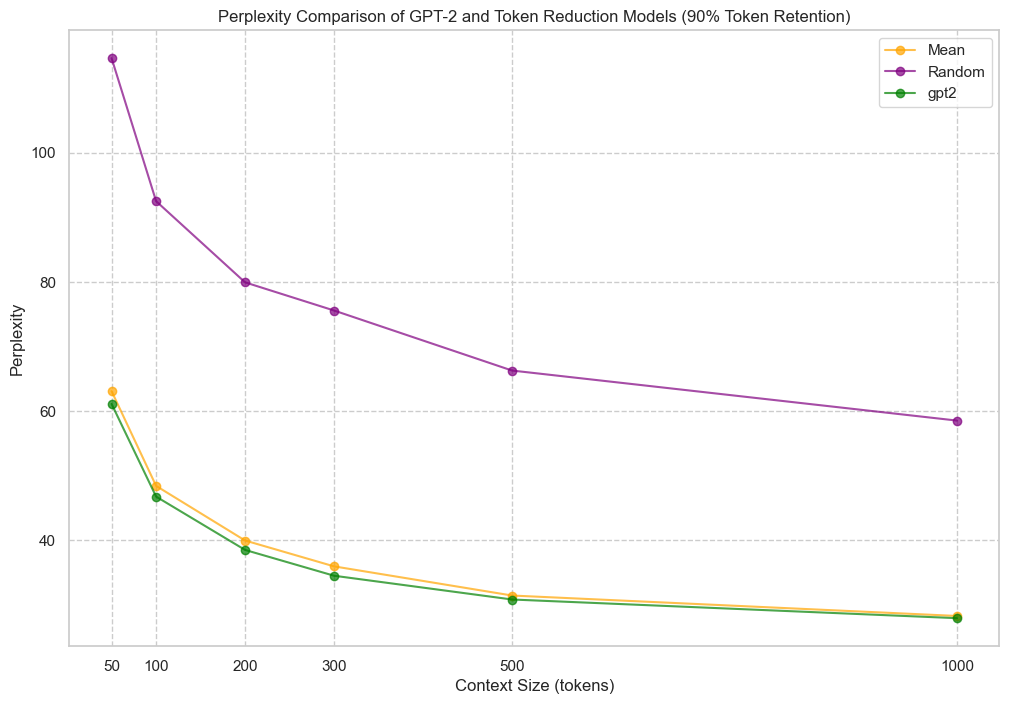

In [29]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
mean_attention_dir = os.path.join(project_root, 'results/Mean_Attention_Removal')
random_removal_dir = os.path.join(project_root, 'results/Random_Removal')

# Dictionary of directories for each method
directories = {
    'Mean': mean_attention_dir,
    'Random': random_removal_dir
}

# Define window sizes
window_sizes = [50, 100, 200, 300, 500, 1000]

# Define output directory
output_dir = os.path.join(project_root, 'results/Perplexity_Comparison_Custom_90')

# Recalculate and plot perplexities
recalculate_and_plot_perplexities_custom_90(window_sizes, directories, output_dir)